In [114]:
import cv2, numpy as np, pathlib
from matplotlib import pyplot as plt
import os 

In [115]:
images = pathlib.Path('./')
images = [str(i) for i in images.glob('*.jpg')]

In [116]:
def applyCanny(path):
    img = cv2.imread(path)
    edges = cv2.Canny(img,100,200)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return edges,img

In [117]:
def crop_canny(cannyOutput,ideal_aspect = 1720/880):
    # threshold to get just the signatur
    retval, thresh_gray = cv2.threshold(cannyOutput, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
    # find pixels that are not zero (koşelerin bulunduğu yerler)
    pixelpoints = cv2.findNonZero(thresh_gray)
    pixels = np.squeeze(pixelpoints,1)
    
    pixels = [p[0] for p in pixelpoints]
    # print(pixels)
    # colon ve satırların ayrılması
    cols = np.sort([p[0] for p in pixels])
    cols={'min':cols.min(),'max':cols.max()}
    rows = np.sort([p[1] for p in pixels])
    rows={'min':rows.min(),'max':rows.max()}
    width,height = cols['max']-cols['min'],rows['max']-rows['min']
    aspect = width/height
        
    # elde edilen cropun aspect ratio sunun düzeltilmesi
    crop = cannyOutput[rows['min']:rows['max'], cols['min']:cols['max']] # create a cropped region of the gray image
    # aspect ratio yı düzeltme işlemi
    if aspect > ideal_aspect:
        # crop the left and right edges:
        new_width = int(ideal_aspect * height)
        offset = int(round((width - new_width) / 2))
        p1 = (rows['min']-offset,rows['max']+offset)
        p2 = (cols['min'],cols['max'])
        crop = cannyOutput[p1[0]-100:p1[1]+100,p2[0]-100:p2[1]+100] # create a cropped region of the gray image
    else:
        # ... crop the top and bottom:
        new_height = int(width / ideal_aspect)
        offset = int(round((height - new_height) / 2))
        p1 = (rows['min'],rows['max'])
        p2 = (cols['min']-offset,cols['max']+offset)
        crop = cannyOutput[rows['min']:rows['max'], cols['min']-offset:cols['max']+offset] # create a cropped region of the gray image   
    plt.imshow(crop,'gray')
    plt.show()
    return p1,p2


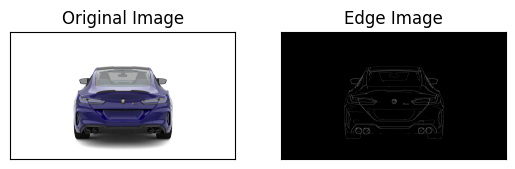

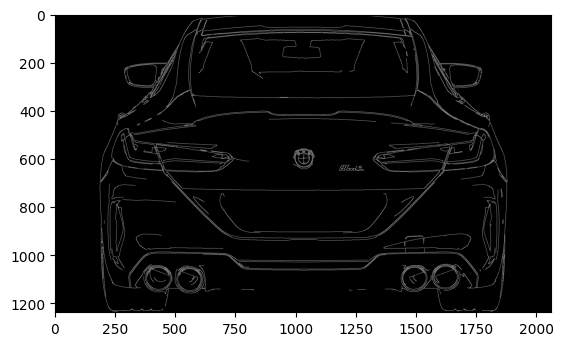

crop size: (1437, 2262, 3)


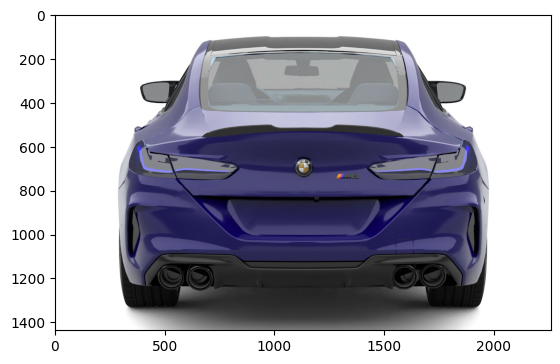

resized size (1080, 1920, 3)


NameError: name 'path2' is not defined

In [118]:
for image in images:
    canny,image= applyCanny(image)
    p1,p2 = crop_canny(canny)
    p1,p2 = list(p1),list(p2)
    # if p1[0]-100<0:
    #     p1[0]=0
    # if p1[1]-100<0:
    #     p1[1]=0
    # if p2[0]+100>1080:
    #     p2[0]=1920
    # if p2[1]+100>1920:
    #     p2[1]=1080
        
    crop = image[p1[0]-100:p1[1]+100,p2[0]-100:p2[1]+100]
    print('crop size:',crop.shape)
    plt.imshow(crop,'gray')
    plt.imshow(crop)
    plt.show()
    resized = cv2.resize(crop,(1920,1080), interpolation = cv2.INTER_AREA)
    print('resized size',resized.shape)
    cv2.imwrite(os.path.join(path2 , rn)+".jpg", resized)
    plt.imshow(resized)
    plt.show()